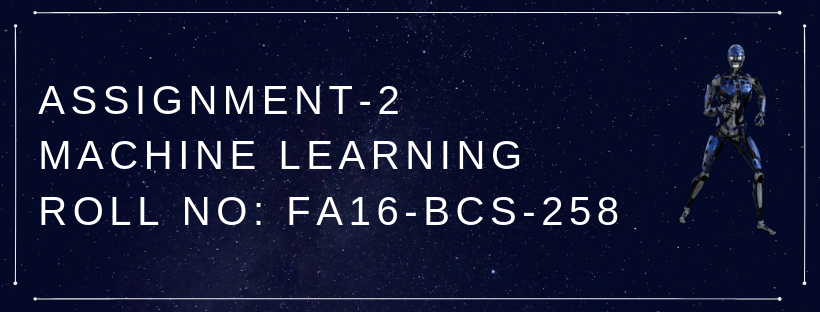

# PHASES 1 & 2: TRAINING AND TESTING

## Step 1: Import Libraries
## Step 2: Read, Understand and Pre-process Train/Test Data
## Step 2.1: Read Data
## Step 2.2: Understand Data
## Step 2.3: Pre-process Data
## Step 3: Label Encoding for Train/Test Data
## Step 4: Feature Extraction – Values of Attributes
## Step 5: Train Machine Learning Algorithms using Train Data
## Step 6: Evaluate Machine Learning Algorithms using Test Data
## Step 7: Selection of Best Model

# PHASE 3: APPLICATION PHASE
## Step 8: Application Phase
## Step 8.1: Combine Data (Train + Test )
## Step 8.2: Train Best Model (see Step 7) on all data (Train + Test)
## Step 8.3: Save the Trained Model as Pickle File
## Step 9: Make prediction on unseen/new data
## Step 9.1: Load the Trained Model (saved in Step 8.3)
## Step 9.2: Take Input from User
## Step 9.3: Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)
## Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction (Male/Female) to User

# Step 1: Import Libraries

In [1]:
import re
import string
import scipy
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from astropy.table import Table, Column
from prettytable import PrettyTable

# Step 2: Read, Understand and Pre-process Train/Test Data

## Step 2.1: Read Data

In [2]:
Import_Train_Data = pd.read_csv('Train.csv').rename_axis('Index',axis=1)
train_data = Import_Train_Data.copy()
Import_Test_Data = pd.read_csv('Test.csv').rename_axis('Index',axis=1)
test_data = Import_Test_Data.copy()

## Step 2.2: Understand Data

In [3]:
Train_DataFrame=pd.DataFrame(train_data)
print("Train Dataset: ")
Train_DataFrame

Train Dataset: 


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [4]:
print("Train Dataset Columns:")
Train_DataFrame.columns

Train Dataset Columns:


Index(['Height', 'Weight', 'Hair', 'Beared', 'Scarf', 'Gender'], dtype='object', name='Index')

In [5]:
print("Number of Instances in Train Dataset:")
Train_Count= len(Train_DataFrame.index)
print("Train Instances: %s" % Train_Count)

Number of Instances in Train Dataset:
Train Instances: 6


In [6]:
Test_DataFrame=pd.DataFrame(test_data)
print("Test Dataset: ")
Test_DataFrame

Test Dataset: 


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [7]:
print("Test Dataset Columns:")
Test_DataFrame.columns

Test Dataset Columns:


Index(['Height', 'Weight', 'Hair', 'Beared', 'Scarf', 'Gender'], dtype='object', name='Index')

In [8]:
print("Number of Instances in Train Dataset:")
Test_Count= len(Test_DataFrame.index)
print("Train Instances: %s" % Test_Count)

Number of Instances in Train Dataset:
Train Instances: 4


In [9]:
Male_Train_Data = train_data.loc[train_data['Gender'] == 'Male']
print("%s Train instances having label 'Male': " % len(Male_Train_Data))
Male_Train_Data

3 Train instances having label 'Male': 


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.3000,196,Bald,Yes,No,Male
2,178.5000,200,Short,No,No,Male
4,175.2222,220,Short,Yes,No,Male


In [10]:
Female_Train_Data = train_data.loc[train_data['Gender'] == 'Female']
print("%s Train instances having label 'Female': " % len(Female_Train_Data))
Female_Train_Data

3 Train instances having label 'Female': 


Index,Height,Weight,Hair,Beared,Scarf,Gender
1,170.0,120,Long,No,No,Female
3,163.4,110,Medium,No,Yes,Female
5,165.0,150,Medium,No,Yes,Female


In [11]:
Male_Test_Data = test_data.loc[test_data['Gender'] == 'Male']
print("%s Test instances having label 'Male': " % len(Male_Test_Data))
Male_Test_Data

2 Test instances having label 'Male': 


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,179.1,185,Long,Yes,No,Male
2,177.8,160,Bald,No,No,Male


In [12]:
Female_Test_Data = test_data.loc[test_data['Gender'] == 'Female']
print("%s Test instances having label 'Female': " % len(Female_Test_Data))
Female_Test_Data

2 Test instances having label 'Female': 


Index,Height,Weight,Hair,Beared,Scarf,Gender
1,160.5,130,Short,No,No,Female
3,161.1,100,Medium,No,No,Female


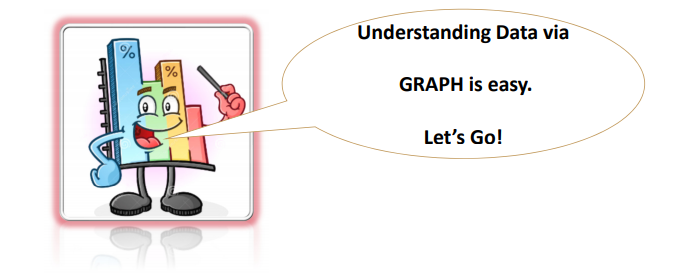

Total number of 'Males' and 'Females' in Train Dataset 


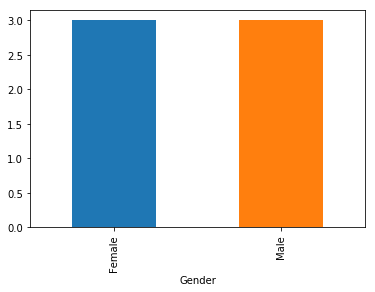

In [13]:
print("Total number of 'Males' and 'Females' in Train Dataset ")
train_data.groupby('Gender').Gender.count().plot(kind='bar')


Total number of 'Males' and 'Females' in Test Dataset 


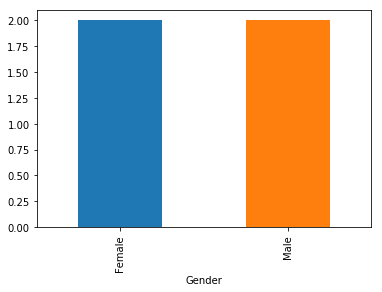

In [14]:
print("Total number of 'Males' and 'Females' in Test Dataset ")
test_data.groupby('Gender').Gender.count().plot(kind='bar')

Number of people having various hair length in Train dataset: 


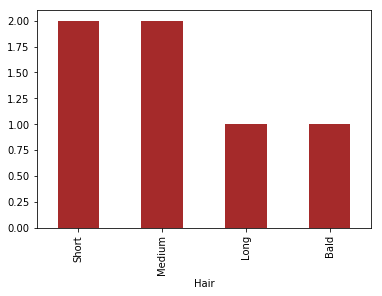

In [15]:
print("Number of people having various hair length in Train dataset: ")

train_data.groupby('Hair').Gender.count().sort_values(ascending=False).plot(kind='bar', color='brown')

Number of people having various hair length in Test dataset: 


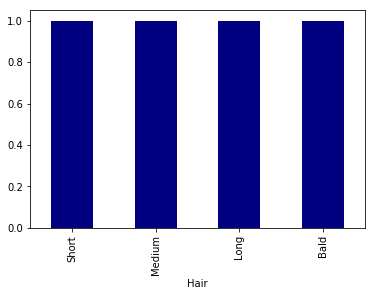

In [16]:
print("Number of people having various hair length in Test dataset: ")
test_data.groupby('Hair').Gender.count().sort_values(ascending=False).plot(kind='bar' , color='navy')

Number of people have/haven't beared in Train dataset: 


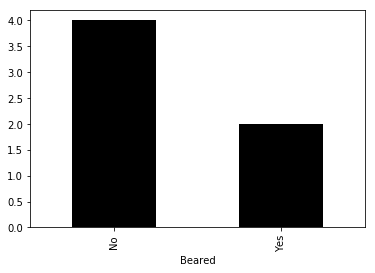

In [17]:
print("Number of people have/haven't beared in Train dataset: ")
train_data.groupby('Beared').Gender.count().plot(kind='bar', color='black')

Number of people have/haven't beared in Test dataset: 


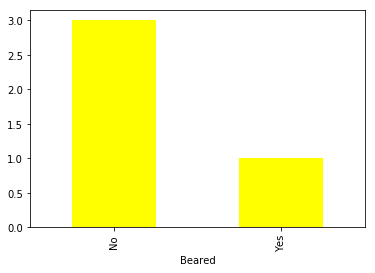

In [18]:
print("Number of people have/haven't beared in Test dataset: ")
test_data.groupby('Beared').Gender.count().plot(kind='bar',color='yellow')

## Step 2.3: Pre-Process Data

In [19]:
print("Train dataset before preprocessing: ")
Train_DataFrame

Train dataset before preprocessing: 


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [20]:
print("Train dataset after preprocessing: ")
Train_DataFrame = Train_DataFrame.round(2)
Train_DataFrame 

Train dataset after preprocessing: 


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


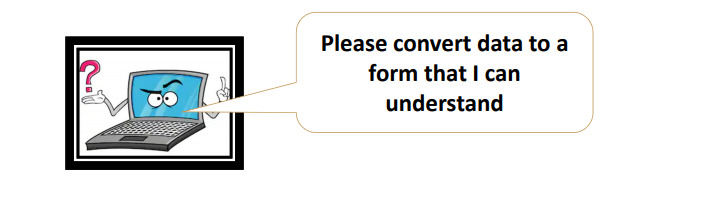

# Step 3: Label Encoding for Train/Test Data

In [21]:
Label_Encoder = preprocessing.LabelEncoder()

In [22]:
print("Gender Attribute Encoding in Train Dataset: ")
train_data['Encoded_Gender'] = LabelEncoder().fit_transform(train_data['Gender'])
train_data[['Gender','Encoded_Gender']]

Gender Attribute Encoding in Train Dataset: 


Index,Gender,Encoded_Gender
0,Male,1
1,Female,0
2,Male,1
3,Female,0
4,Male,1
5,Female,0


In [23]:
print("Scarf Attribute Encoding in Train Dataset: ")
train_data['Encoded_Scarf'] = LabelEncoder().fit_transform(train_data['Scarf'])
train_data[['Scarf','Encoded_Scarf']].rename_axis('Index',axis=1)

Scarf Attribute Encoding in Train Dataset: 


Index,Scarf,Encoded_Scarf
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0
5,Yes,1


In [24]:
print("Beared Attribute Encoding in Train Dataset: ")
train_data['Encoded_Beared'] = LabelEncoder().fit_transform(train_data['Beared'])
train_data[['Beared','Encoded_Beared']].rename_axis('Index',axis=1)

Beared Attribute Encoding in Train Dataset: 


Index,Beared,Encoded_Beared
0,Yes,1
1,No,0
2,No,0
3,No,0
4,Yes,1
5,No,0


In [25]:
print("Hair Attribute Encoding in Train Dataset: ")
train_data['Encoded_Hair'] = LabelEncoder().fit_transform(train_data['Hair'])
train_data[['Hair','Encoded_Hair']].rename_axis('Index',axis=1)

Hair Attribute Encoding in Train Dataset: 


Index,Hair,Encoded_Hair
0,Bald,0
1,Long,1
2,Short,3
3,Medium,2
4,Short,3
5,Medium,2


In [26]:
print("Original Train Data:")
Train_DataFrame

Original Train Data:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


In [27]:
Substitute_Train_Data = Train_DataFrame.copy()
cols = ['Hair','Beared','Scarf','Gender']
for col in cols:  
    Substitute_Train_Data[col] = Label_Encoder.fit_transform(Substitute_Train_Data[col])
    
Train_FinalData = Substitute_Train_Data
print('Train Data after Label Encoding:')
Train_FinalData


Train Data after Label Encoding:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0


In [28]:
print("Original Test Data:")
Test_DataFrame

Original Test Data:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [29]:
Substitute_Test_Data = Test_DataFrame.copy()
cols = ['Hair','Beared','Scarf','Gender']
for col in cols:  
    Substitute_Test_Data[col] = Label_Encoder.fit_transform(Substitute_Test_Data[col])
    
Test_FinalData = Substitute_Test_Data
print('Train Data after Label Encoding:')
Test_FinalData


Train Data after Label Encoding:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


# Step 5: Train Machine Learning Algorithms using Train Data

In [30]:
print("Parameters and their values: ")
logreg = LogisticRegression(multi_class='ovr',n_jobs=1,solver='liblinear' )
logreg

Parameters and their values: 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
print("Parameters and their values: ")
clf = RandomForestClassifier( n_estimators=10,n_jobs=1)
clf

Parameters and their values: 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
print("Parameters and their values: ")
SVC = LinearSVC()
SVC

Parameters and their values: 


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [33]:
print("Parameters and their values: ")
BNB = BernoulliNB()
BNB

Parameters and their values: 


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Step 6: Evaluate ML Algorithms using Test Data

In [34]:
X_train= Train_FinalData[['Height','Weight','Hair','Beared','Scarf']]
y_train = Train_FinalData['Gender']

X_test= Test_FinalData[['Height','Weight','Hair','Beared','Scarf']]
y_test= Test_FinalData['Gender']


In [35]:
logreg.fit(X_train, y_train)

y_logreg_pred = logreg.predict(X_test)

y_logreg_accuracy = accuracy_score(y_test, y_logreg_pred)

logreg_pred_df = pd.DataFrame()
logreg_pred_df= Test_DataFrame.copy()
Label_Encoder.fit(Train_DataFrame['Gender'])
logreg_pred_df['Predicted_Gender'] = Label_Encoder.inverse_transform(y_logreg_pred)
logreg_pred_df

Index,Height,Weight,Hair,Beared,Scarf,Gender,Predicted_Gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [36]:
print("Prediction using Logistic Regression:")
print("Accuracy Score = %2.2f" % y_logreg_accuracy)

Prediction using Logistic Regression:
Accuracy Score = 0.75


In [37]:
clf.fit(X_train,y_train)

y_clf_pred=clf.predict(X_test)

y_clf_accuracy = accuracy_score(y_test, y_clf_pred)

clf_pred_df = pd.DataFrame()
clf_pred_df= Test_DataFrame.copy()
Label_Encoder.fit(Train_DataFrame['Gender'])
clf_pred_df['Predicted_Gender'] = Label_Encoder.inverse_transform(y_clf_pred)
clf_pred_df

Index,Height,Weight,Hair,Beared,Scarf,Gender,Predicted_Gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [38]:
print("Prediction using RandomForestClassifier:")
print("Accuracy Score :", y_clf_accuracy)

Prediction using RandomForestClassifier:
Accuracy Score : 0.75


In [39]:
SVC = LinearSVC(max_iter=2000)
SVC.fit(X_train,y_train)

y_SVC_pred = SVC.predict(X_test)

y_SVC_accuracy = accuracy_score(y_test, y_SVC_pred)

SVC_pred_df = pd.DataFrame()
SVC_pred_df= Test_DataFrame.copy()
Label_Encoder.fit(Train_DataFrame['Gender'])
SVC_pred_df['Predicted_Gender'] = Label_Encoder.inverse_transform(y_SVC_pred)
SVC_pred_df

Index,Height,Weight,Hair,Beared,Scarf,Gender,Predicted_Gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [40]:
print("Prediction using LinearSVC:")
print("Accuracy Score :", y_SVC_accuracy)

Prediction using LinearSVC:
Accuracy Score : 0.75


In [41]:
BNB.fit(X_train,y_train)

y_BNB_pred = BNB.predict(X_test)

y_BNB_accuracy = accuracy_score(y_test, y_BNB_pred)

BNB_pred_df = pd.DataFrame()
BNB_pred_df= Test_DataFrame.copy()
Label_Encoder.fit(Train_DataFrame['Gender'])
BNB_pred_df['Predicted_Gender'] = Label_Encoder.inverse_transform(y_BNB_pred)
BNB_pred_df


Index,Height,Weight,Hair,Beared,Scarf,Gender,Predicted_Gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,100,Medium,No,No,Female,Female


In [42]:
print("Prediction using BernoulliNB:")
print("Accuracy Score :", y_BNB_accuracy )

Prediction using BernoulliNB:
Accuracy Score : 1.0


In [43]:
scoreDict = {'LogisticRegression':y_logreg_accuracy, "RandomForestClassifier":y_clf_accuracy, "LinearSVC":y_SVC_accuracy, "BernoulliNB":y_BNB_accuracy}

In [44]:
BestModelName,BestModelValue = max(scoreDict.items(), key=lambda k: k[1])

# Step 7: Selection of Best Model

In [45]:
x = PrettyTable()

x.field_names = ["Model","Accuracy"]

x.add_row(["LogisticRegression",y_logreg_accuracy])
x.add_row(["RandomForestClassifier", y_clf_accuracy])
x.add_row(["LinearSVC",y_SVC_accuracy])
x.add_row(["BernoulliNB",y_BNB_accuracy])
print("Detailed Performance of all the models")
print("======================================")
print(x)

Detailed Performance of all the models
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.75   |
| RandomForestClassifier |   0.75   |
|       LinearSVC        |   0.75   |
|      BernoulliNB       |   1.0    |
+------------------------+----------+


In [46]:
y = PrettyTable()

y.field_names = ["Model","Accuracy"]

y.add_row([BestModelName,BestModelValue])
print("Best Model")
print("=====================================")
print(y)

Best Model
+-------------+----------+
|    Model    | Accuracy |
+-------------+----------+
| BernoulliNB |   1.0    |
+-------------+----------+


# Step 8: Application Phase

## Step 8.1: Combine Data (Train+Test)

In [47]:
Train_Data_toConvert = Train_FinalData.copy()
train_cols = ['Weight','Hair','Beared','Scarf']
for col in train_cols:  
    Train_Data_toConvert[col] = Train_Data_toConvert[col].astype(dtype=np.float64)
print("Train Feature in form of DataFrame:")
Train_Data_toConvert

Train Feature in form of DataFrame:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.30,196.0,0.0,1.0,0.0,1
1,170.00,120.0,1.0,0.0,0.0,0
2,178.50,200.0,3.0,0.0,0.0,1
3,163.40,110.0,2.0,0.0,1.0,0
4,175.22,220.0,3.0,1.0,0.0,1
5,165.00,150.0,2.0,0.0,1.0,0


In [48]:
Test_Data_toConvert = Test_FinalData.copy()
test_cols = ['Weight','Hair','Beared','Scarf']
for col in test_cols:  # Iterate over chosen columns
    Test_Data_toConvert[col] = Test_Data_toConvert[col].astype(dtype=np.float64)
print("Test Feature in form of DataFrame:")
Test_Data_toConvert

Test Feature in form of DataFrame:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,179.1,185.0,1.0,1.0,0.0,1
1,160.5,130.0,3.0,0.0,0.0,0
2,177.8,160.0,0.0,0.0,0.0,1
3,161.1,100.0,2.0,0.0,0.0,0


In [49]:
Train_Test_Merge = Train_Data_toConvert.append(Test_Data_toConvert)
print("All Features in the form of DataFrame:")
Train_Test_Merge

All Features in the form of DataFrame:


Index,Height,Weight,Hair,Beared,Scarf,Gender
0,180.30,196.0,0.0,1.0,0.0,1
1,170.00,120.0,1.0,0.0,0.0,0
2,178.50,200.0,3.0,0.0,0.0,1
3,163.40,110.0,2.0,0.0,1.0,0
4,175.22,220.0,3.0,1.0,0.0,1
5,165.00,150.0,2.0,0.0,1.0,0
0,179.10,185.0,1.0,1.0,0.0,1
1,160.50,130.0,3.0,0.0,0.0,0
2,177.80,160.0,0.0,0.0,0.0,1
3,161.10,100.0,2.0,0.0,0.0,0


## Step 8.2: Train Best Model on All Data 

In [50]:
print("Train Best Model on All Data:")
clf

Train Best Model on All Data:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
X = Train_Test_Merge[['Height','Weight','Hair','Beared','Scarf']]
y = Train_Test_Merge['Gender']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [53]:
clf_merged = RandomForestClassifier(n_estimators=100)

clf_merged.fit(X_train,y_train)

y_merged_pred=clf.predict(X_test)

In [54]:
print("Accuracy of Best Model on All Data:")
print("Accuracy:",metrics.accuracy_score(y_test, y_merged_pred))

Accuracy of Best Model on All Data:
Accuracy: 0.75


## Step 8.3: Save the Trained Model as Pickle File

In [55]:
print("Save the trained model as Pickle File:")
filename = 'finalized_best_model.sav'
pickle.dump(clf_merged, open(filename, 'wb'))

Save the trained model as Pickle File:


# Step 9. Make Predictions on Unseen/New Data

## Step 9.1: Load the Trained Model (saved in Step 8.3)

In [56]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Model Loaded.")
print("Accuracy of Best Model:",result)

Model Loaded.
Accuracy of Best Model: 1.0


## Step 9.2: Take Input from User 

In [57]:
Input_Height = float(input("Please enter your Height here (Centimeter): "))
Input_Weight = int(input("Please enter your Weight here (kg): "))
Input_Hair = input("Please enter your Hair Length here (Bald/Long/Short/Medium): ")
Input_Beared = input("Do you have Beared? (Yes/No): " )
Input_Scarf = input("Do you wear Scarf? (Yes/No): ")

Please enter your Height here (Centimeter): 170
Please enter your Weight here (kg): 50
Please enter your Hair Length here (Bald/Long/Short/Medium): Long
Do you have Beared? (Yes/No): No
Do you wear Scarf? (Yes/No): No


## Step 9.3: Convert User Input into Feature Vector  

In [58]:
print("User Input in Actual DataFrame form:")
Input_Data = pd.DataFrame(data=[[Input_Height, Input_Weight, Input_Hair, Input_Beared, Input_Scarf]], columns=['Height','Weight','Hair','Beared','Scarf'])
Input_Data

User Input in Actual DataFrame form:


,Height,Weight,Hair,Beared,Scarf
0,170.0,50,Long,No,No


In [59]:
my_Data_Frame = Input_Data.copy()
my_Data_Frame

,Height,Weight,Hair,Beared,Scarf
0,170.0,50,Long,No,No


In [60]:
Label_Encoder.fit(Train_DataFrame['Hair'])
Input_Data['Hair'] =  Label_Encoder.transform(Input_Data['Hair'])
Label_Encoder.fit(Train_DataFrame['Beared'])
Input_Data['Beared'] =  Label_Encoder.transform(Input_Data['Beared'])
Label_Encoder.fit(Train_DataFrame['Scarf'])
Input_Data['Scarf'] =  Label_Encoder.transform(Input_Data['Scarf'])
print("User Input in Encoded DataFrame form:")
Input_Data

User Input in Encoded DataFrame form:


,Height,Weight,Hair,Beared,Scarf
0,170.0,50,1,0,0


In [62]:
Predicted_result = loaded_model.predict(Input_Data)
Label_Encoder.fit(Train_DataFrame['Gender'])
Unseen_Prediction = Label_Encoder.inverse_transform(Predicted_result)


In [63]:
print("Prediction",Unseen_Prediction)

Prediction ['Female']
